## Importer data

In [198]:
import matplotlib.pyplot as plt
import pandas
data = pandas.read_csv('data.csv', ';')
data

,SampleDate,Copenhagen,Aarhus,Gentofte,Rudersdal
0,26-02-2020,0,0,0,0
1,27-02-2020,1,0,0,0
2,28-02-2020,0,1,0,0
3,01-03-2020,1,0,0,0
4,02-03-2020,1,0,0,0
...,...,...,...,...,...
400,02-04-2021,90,33,7,9
401,03-04-2021,90,41,6,8
402,04-04-2021,94,23,6,3
403,05-04-2021,22,0,2,1


## Lad os se en bar graf over tallene.
vi nøjes med de sidste 3 uger.

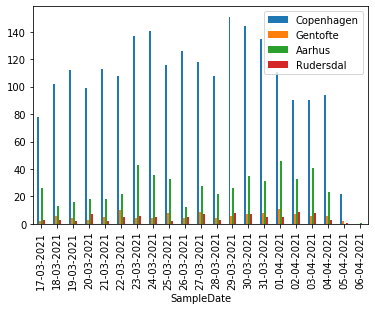

In [199]:
data.tail(21).plot(y=['Copenhagen', 'Gentofte', 'Aarhus', 'Rudersdal'], x='SampleDate', kind='bar')
plt.show()

## Vis en pie-chart med tal for byerne.
Det fordrer en summering af hver kolonne.

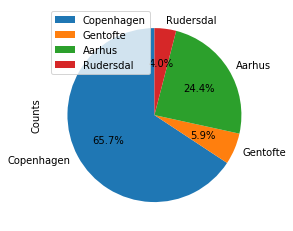

In [200]:
# Vi summerer kolonnerne (axis = 0)
sums = data.sum(axis=0)

# Opret ny dataframe med sum for hver by.
cityValue = pandas.DataFrame([sums.Copenhagen, sums.Gentofte, sums.Aarhus, sums.Rudersdal], columns=['Counts'],index=['Copenhagen', 'Gentofte', 'Aarhus', 'Rudersdal'] )

# Vis piechart med sum og procent.
cityValue.plot.pie(y='Counts', autopct='%1.1f%%', startangle=90)


## Vis udvikling over tid i series graf.
Alle data medtages.

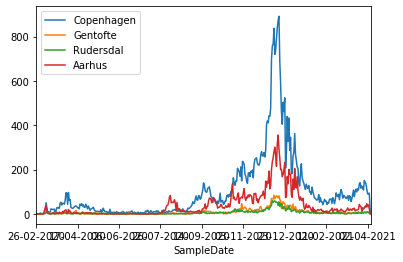

In [201]:
data.plot(x='SampleDate', y=['Copenhagen', 'Gentofte', 'Rudersdal', 'Aarhus'])

## Boxplot med data
Heraf ses bl.a., at de øvre 25 % af data er spredt ud over en stor afstand (mange smittetilfælde).

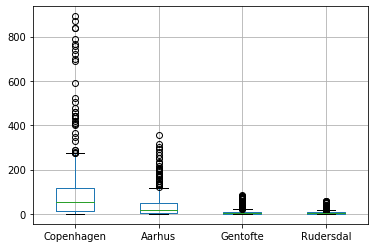

In [202]:
data.boxplot()

## Beregn t-value
Her bruges hele population hvilket formentlig ikke er retvisende pga. outliers og stor forskel i varianser.

In [203]:
# https://www.youtube.com/watch?v=pTmLQvMM-1M
import math
signal = data.Copenhagen.mean()-data.Aarhus.mean()

# variance measures how far a set of numbers is spread out from their average value
variance_copenhagen = data.Copenhagen.std()**2
variance_aarhus = data.Aarhus.std()**2

# are variances similar?
print("variance cph: " + str(variance_copenhagen) + "\nvariance aah: " + str(variance_aarhus))

noise = math.sqrt((variance_copenhagen/data.Copenhagen.count()) + (variance_aarhus / data.Aarhus.count())) # skal vi medregne varians faktor?

t_value = signal / noise
print("signal: " + str(signal) + "\nnoise: " +str(noise) + "\nt_value: " + str(t_value))

variance cph: 23322.989878987908
variance aah: 3409.478266715559
signal: 65.20987654320987
noise: 8.124413467255476
t_value: 8.026410374857319


## Beregn t-value
Her bruges et sample med 20 elementer. Her vil vi teoretisk slippe outliers i nogle gennemløb hvilket vil give en mere retvisende t-value. Der er stadig stor forskel i varianser, men Københavns befolkning er også væsentlig større end Aarhus' hvilket kan være årsagen til flere daglige tests .

In [204]:
# degree of freedom = n1 + n2 - 2
degree_of_freedom = data.Copenhagen.count() + data.Aarhus.count() - 2
critical_value = 1.962  # critical value er 1.962 når n>100, probability=0.05 med two tails. 
                        # 5 af 100 gange accepteres null-hypotesen. www.ttable.org

In [205]:
sample = data.sample(n=20)  # critical value er 2.086 når n=20, probability=0.05 med two tails. 
                            # 5 af 100 gange accepteres null-hypotesen. www.ttable.org
signal = sample.Copenhagen.mean()-sample.Aarhus.mean()
sample_variance_cph = sample.Copenhagen.std()**2
sample_variance_aah = sample.Aarhus.std()**2

# Are variances similar?
print("variance cph: " + str(sample_variance_cph) + "\nvariance aah: " + str(sample_variance_aah))

noise = math.sqrt((sample_variance_cph/sample.Copenhagen.count()) + (sample_variance_aah/sample.Aarhus.count()))

t_value = signal / noise
print("signal: " + str(signal) + "\nnoise: " +str(noise) + "\nt_value: " + str(t_value))

variance cph: 34397.15789473684
variance aah: 4475.313157894738
signal: 89.55
noise: 44.086546163558545
t_value: 2.031231924310302


## Fjern outliers
For at normalisere datasættet en smule, fjerner vi ekstremerne så vores t-value bliver mere konsistent.

In [206]:
# https://stackoverflow.com/questions/46245035/pandas-dataframe-remove-outliers
def Remove_Outlier_Indices(df:pandas.DataFrame):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1 # inter_quantile_range    
    trueList = ~((df < Q1) | (df > Q3)) #trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

test = Remove_Outlier_Indices(data)
dataSubset = data[test]

## t-value
Nu uden outliers fordi værdier udenfor 1. og 3. kvantil er frasorterede.  
Vores t-value holder sig i reglen over critical value på 2.086, der er dog lejlighedsvise undtagelser.

In [217]:
sample = dataSubset.sample(n=20)  # critical value er 2.086 når n=20, probability=0.05 med two tails. 
                            # 5 af 100 gange accepteres null-hypotesen. www.ttable.org
signal = sample.Copenhagen.mean()-sample.Aarhus.mean()
sample_variance_cph = sample.Copenhagen.std()**2
sample_variance_aah = sample.Aarhus.std()**2

# Are variances similar?
print("variance cph: " + str(sample_variance_cph) + "\nvariance aah: " + str(sample_variance_aah))

noise = math.sqrt((sample_variance_cph/sample.Copenhagen.count()) + (sample_variance_aah/sample.Aarhus.count()))

t_value = signal / noise
print("signal: " + str(signal) + "\nnoise: " +str(noise) + "\nt_value: " + str(t_value))

variance cph: 722.75
variance aah: 27.34444444444444
signal: 43.3
noise: 9.112628599915615
t_value: 4.751647620139042
